# Task-1: Prediction Using Supervised ML
## Author: Rimsha Salahuddin
### GRIPFEBRUARY22 @The Sparks Foundation
### Data Science & Business Analytics Intern

In this task we have to predict the percentage of student based on the no. of study hours.

-This a simple regression task as it involves only 2 variables

-Data set used- http://bit.ly/w-data

-Problem statement:Predicting the score if a student studies for 9.25 hrs/day

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

### Reading the data from the given link

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### DataFrame.info() returns a concise summary of a dataframe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### DataFrame.head([n]):The function head returns the first n rows from the dataframe
By default, the head() returns first 5 rows


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### DataFrame.tail([n]):The function tail returns the last n rows from the dataframe
It is used for quickly verifiying data


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Dataframe.isnull().sum():To check the count of missing values present in each column 


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Plotting our data points on Scatter Plot to eyeball our dataset and see if we can manually find any relationship between the data. 

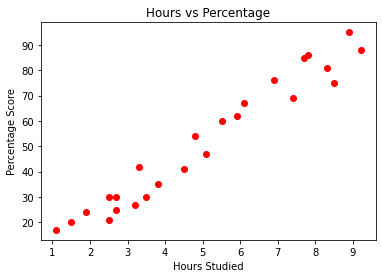

In [7]:
plt.scatter(data["Hours"],data["Scores"],c='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

### **Splitting Data in Dependent and Independent Variables**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

### Train and Test Splitting
using Scikit-Learn's built-in train_test_split() method:

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm
Using Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


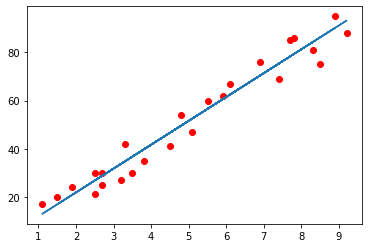

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,c='red')
plt.plot(X, line);
plt.show()

### Predictions

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Model Evaluation
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
print("Coefficients\n:",regressor.coef_)
print("Intercept:\n",regressor.intercept_)

Coefficients
: [9.91065648]
Intercept:
 2.018160041434683


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### Solution

In [16]:
hours=9.25
own_pred=regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Conclusion

Therefore, **According to the given Model**

If a student studies for **9.25 hrs/day**, then his/her predicted score is **93.69**